In [ ]:
# Goal: Create a model that can accept image as input and classify image as cat and dog

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
# Extract the Zip File ---- Step required in colab if zip file uploaded

!unzip cats_and_dogs.zip


Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
   creating: cats_and_dogs/train/
   creating: cats_and_dogs/train/cats/
  inflating: cats_and_dogs/train/cats/cat.0.jpg  
  inflating: cats_and_dogs/train/cats/cat.1.jpg  
  inflating: cats_and_dogs/train/cats/cat.10.jpg  
  inflating: cats_and_dogs/train/cats/cat.100.jpg  
  inflating: cats_and_dogs/train/cats/cat.101.jpg  
  inflating: cats_and_dogs/train/cats/cat.102.jpg  
  inflating: cats_and_dogs/train/cats/cat.103.jpg  
  inflating: cats_and_dogs/train/cats/cat.104.jpg  
  inflating: cats_and_dogs/train/cats/cat.105.jpg  
  inflating: cats_and_dogs/train/cats/cat.106.jpg  
  inflating: cats_and_dogs/train/cats/cat.107.jpg  
  inflating: cats_and_dogs/train/cats/cat.108.jpg  
  inflating: cats_and_dogs/train/cats/cat.109.jpg  
  inflating: cats_and_dogs/train/cats/cat.11.jpg  
  inflating: cats_and_dogs/train/cats/cat.110.jpg  
  inflating: cats_and_dogs/train/cats/cat.111.jpg  
  inflating: cats_and_dogs/train/cats/cat.112

In [ ]:
# #===============Incase of one directory and need to split =============================
# my_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
#                                                                validation_split=0.2)

# trainImageData = train_generator.flow_from_directory('cats_and_dogs/train',
#                                                      batch_size=20, #How many images to pass per tick
#                                                      class_mode='binary', #binary --- Binary Classification | categorical ---- Multi-class classification
#                                                      target_size=(64,64),
#                                                      subset='training')

# testImageData = test_generator.flow_from_directory('cats_and_dogs/train',
#                                                      batch_size=20, #How many images to pass per tick
#                                                      class_mode='binary', #binary --- Binary Classification | categorical ---- Multi-class classification
#                                                      target_size=(64,64),
#                                                      subset='validation')

In [ ]:
# Preprocessing --- Goal is to make the data compatible for CNN
# Tensorflow by default offers direct class to achieve preprocessing



# ImageGenerators

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# Pass my images

trainImageData = train_generator.flow_from_directory('cats_and_dogs/train',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))

testImageData = test_generator.flow_from_directory('cats_and_dogs/validation',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(64,64))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
trainImageData.image_shape

(64, 64, 3)

In [ ]:
# Architect the NN

model = tf.keras.Sequential()

# Two Convolutional Layer

#First Convolutional Layer
# Conv2D(noFeatureMaps, kernelShape, inputShape, activation)

model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=trainImageData.image_shape , padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Second Convolutional Layer
# Conv2D(noFeatureMaps, kernelShape, inputShape, activation)

model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu",padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Flatten

model.add(tf.keras.layers.Flatten())

#FC(Fully Connected Layer) layer | ANN Layer

model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#if class mode --- categorical
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

#if class mode ---- binary
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,267,666 (8.65 MB)

 Trainable params: 2,267,666 (8.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
type(trainImageData)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [ ]:
class MyCLRuleMonitor(tf.keras.callbacks.Callback):
  def __init__(self, CL):
    super(MyCLRuleMonitor).__init__()
    self.CL = CL

  def on_epoch_end(self, epoch, logs=None):
    trainScore = logs["accuracy"]
    testScore = logs["val_accuracy"]

    if testScore > trainScore and testScore >= self.CL:
      self.model.stop_training = True


  #Model with minimum 70% accuracy
  #Model to be a generalized model(Model should perform not only with training but also with unknown data)(avoid overfitting)

In [ ]:
#Fit

#steps_per_epoch --- applicable for training data --- no_training_images/batchSize
#validation_steps --- applicable for testing data --- no_testing_images/batchSize

model.fit(trainImageData,
          validation_data=testImageData,
          epochs=2,
          steps_per_epoch=(len(trainImageData.filenames) // trainImageData.batch_size - 1),
          validation_steps=(len(testImageData.filenames) // testImageData.batch_size - 1 ),
          callbacks=[MyCLRuleMonitor(0.7)])

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.5212 - loss: 0.6952 - val_accuracy: 0.5194 - val_loss: 0.6966
Epoch 2/2
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.4000 - loss: 0.7115 - val_accuracy: 0.5500 - val_loss: 0.6800


In [ ]:
#Deploy Example

model

<Sequential name=sequential_2, built=True>

In [ ]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs/train/cats/cat.1.jpg', target_size=(64,64))

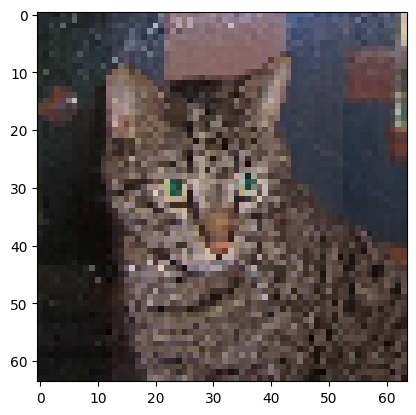

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
imgArray= tf.keras.preprocessing.image.img_to_array(img)
imgArray.shape

(64, 64, 3)

In [ ]:
import numpy as np
compatibleArray = np.expand_dims(imgArray, axis=0)
compatibleArray.shape

(1, 64, 64, 3)

In [ ]:
model.predict(compatibleArray)

In [ ]:
trainImageData.class_indices.items()

In [ ]:
{v:k for k,v in trainImageData.class_indices.items()} [ np.argmax(model.predict(compatibleArray)) ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'cats'

In [ ]:
{v:k for k,v in trainImageData.class_indices.items()}

{0: 'cats', 1: 'dogs'}